# PERFORMANS ÖLÇÜM METRİKLERİ

Bu ödevde, bir önceki derste Titanic verileri ile oluşturduğunuz modelin performansını ölçeceksiniz. 

**Modelinizin performansına bu derste öğrendiğiniz metriklerlerle değerlendiriniz.**

In [6]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
train_df = pd.read_csv("train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
train_df1= pd.concat([train_df, pd.get_dummies(train_df["Sex"], drop_first=True)], axis=1)
train_df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [9]:
train_df1["Age"]=train_df1["Age"].fillna(train_df1.groupby("Sex")["Age"].transform("mean"))
train_df1["Age"]=train_df1["Age"].fillna(train_df1["Age"].mean())

In [10]:
train_df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
male             0
dtype: int64

In [11]:
X= train_df1[["Pclass","male", "Age", "SibSp", "Parch", "Fare"]]
y = train_df1["Survived"]

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=1111)
log_reg = LogisticRegression(solver='lbfgs', multi_class="ovr")

In [13]:
log_reg.fit(X_train,y_train)

LogisticRegression(multi_class='ovr')

In [14]:
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.80
Accuracy on Test Data  : 0.85


## Hata Matrisi

In [15]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [16]:
pred_train = log_reg.predict(X_train)
pred_test = log_reg.predict(X_test)

In [17]:
pred_test_prob = log_reg.predict_proba(X_test)[:,1]

In [18]:
from sklearn.metrics import confusion_matrix
hata_matrisi_train = confusion_matrix(y_train, pred_train)
hata_matrisi_test = confusion_matrix(y_test, pred_test)

In [19]:
print("Hata Matrisi (Train verileri)", "-"*30, hata_matrisi_train, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Train verileri)
------------------------------
[[391  57]
 [ 85 179]]
Hata Matrisi (Test verileri)
------------------------------
[[93  8]
 [18 60]]


In [20]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 93
Doğru pozitif sayısı   : 60
Yanlış pozitif sayısı  : 8
Yanlış negatif sayısı  : 18


### 1. Doğruluk (Accuracy)

In [21]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  log_reg.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, pred_test))

Modelden alınan doğruluk değeri :  0.8547486033519553
Hesaplanan doğruluk değeri      :  0.8547486033519553
accuracy_score() değeri         :  0.8547486033519553


### 2. Hata Oranı (Error Rate)

**hataoranı = 1 − doğruluk**

In [22]:
hataoranı = 1- 0.8547486033519553
print(hataoranı)

0.14525139664804465


### 3. Hassasiyet (Precision)

In [23]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, pred_test))

Hesaplanan doğruluk değeri      :  0.8823529411764706
precision_score() değeri        :  0.8823529411764706


### 4. Duyarlılık (Recall/Sensitivity)

In [24]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(y_test, pred_test))

Hesaplanan doğruluk değeri   :  0.7692307692307693
recall_score() değeri        :  0.7692307692307693


### 5. Özgünlük (Specificity)

In [25]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.9207920792079208


### 6. F1 (F1 Score)

In [26]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, pred_test)
duyarlılık_değeri = recall_score(y_test, pred_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, pred_test))

Hesaplanan f1 skoru   :  0.8219178082191781
f1_score() değeri     :  0.8219178082191781


### Bütün Metrikler

In [27]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,pred_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, pred_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, pred_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test,pred_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, pred_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       101
           1       0.88      0.77      0.82        78

    accuracy                           0.85       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.85      0.85       179

f1_score() değeri        : 0.82
recall_score() değeri    : 0.77
precision_score() değeri : 0.88


Hassasiyet : [0.83783784 0.88235294]
Duyarlılık : [0.92079208 0.76923077]
F1 Skoru   : [0.87735849 0.82191781]


**ROC eğrisi ve Hassasiyet/Duyarlılık Eğrisini farklı "c" değerleri için çizdirin.**

### ROC Eğrisi (ROC/AUC)

In [28]:
pred_test_prob = log_reg.predict_proba(X_test)[:,1]

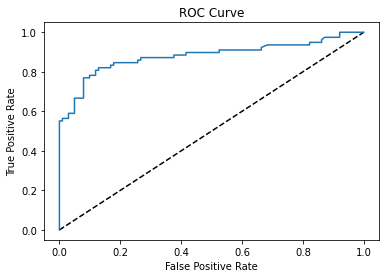

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, pred_test_prob)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [30]:
print('AUC value : ', roc_auc_score(y_test, pred_test_prob ))

AUC value :  0.8797283574511297


### Hassasiyet/Duyarlılık Eğrisi

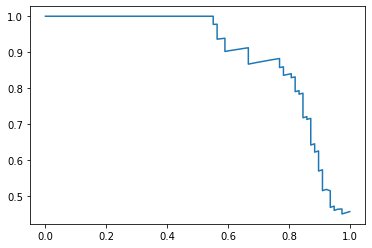

In [31]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, pred_test_prob)

plt.plot(duyarlılık, hassasiyet)
plt.show()